<a href="https://colab.research.google.com/github/SesameSeeders/apcv485_schoolwork/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aiden Brimhall | Lab 1 | APCV 485

### Comments
I'm still a bit new at using Google Colab- everything I've done has been through Obsidian before. I'm still a bit unsure if I need to mount the drive and install these toolboxes. I'm going to leave them here for now, but I don't think I need them

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

!pip install adversarial-robustness-toolbox
!pip install opacus cleverhans

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.4/254.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 18.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lab 1

xTrain shape: (800, 10)
yTrain shape: (800,)
xTest shape : (200, 10)
yTest shape : (200,)
Training class counts: [408 392]
Testing class counts : [102  98]
Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5011 - loss: 0.7289 - val_accuracy: 0.5063 - val_loss: 0.6910
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5011 - loss: 0.7027 - val_accuracy: 0.5188 - val_loss: 0.6746
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5222 - loss: 0.6855 - val_accuracy: 0.6375 - val_loss: 0.6618
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6337 - loss: 0.6723 - val_accuracy: 0.7437 - val_loss: 0.6473
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6929 - loss: 0.6585 - val_accuracy: 0.8250 - val_loss: 0.6268
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7560 - loss: 0.6406 - val_accuracy: 0.8687 - val_loss: 0.6021
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7918 - loss: 0.6189 - v

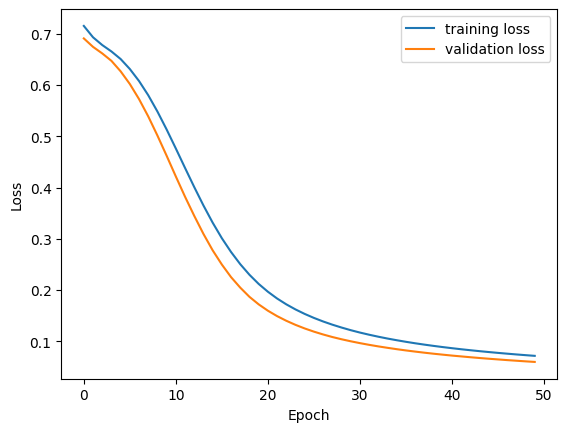


[Bonus Q1] No activation functions -> Test Accuracy: 0.9750000238418579
[Bonus Q2] Learning rate 0.0001 // Test Accuracy: 0.824999988079071
[Bonus Q2] Learning rate 0.001 // Test Accuracy: 0.9750000238418579
[Bonus Q2] Learning rate 0.01 // Test Accuracy: 0.9800000190734863
[Bonus Q3] Dropout rate 0.3 // Test Accuracy: 0.9649999737739563


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# TODO: Task 1 - Load and prepare data
# Generate synthetic dataset
def generate_dataset(n_samples = 1000):
    """Generate synthetic dataset for binary classification"""
    # Generate random features (0 to 1)
    x = np.random.rand(n_samples, 10).astype(np.float32)

    #if sum of first 5 features > sum of last 5 features:
    #   class 1
    #else:
    #   class 0
    y = (x[:, :5].sum(axis = 1) > x[:, 5:].sum(axis = 1)).astype(np.int32)

    return x, y

#Create dataset
x, y = generate_dataset(n_samples = 1000)

#Split into 800 training and 200 testing samples
xTrain, xTest, yTrain, yTest = train_test_split(
    x, y, test_size = 0.2, random_state = 42, stratify = y
)

#Verify shapes and class balance
print("xTrain shape:", xTrain.shape)
print("yTrain shape:", yTrain.shape)
print("xTest shape :", xTest.shape)
print("yTest shape :", yTest.shape)

print("Training class counts:", np.bincount(yTrain))
print("Testing class counts :", np.bincount(yTest))


#TODO: Task 2 - Build the neural network
def build_model(remove_hidden_activations = False, dropout_rate = None):
    """Build a feedforward neural network"""

    model = keras.Sequential() #Makes a stack of layers model
    model.add(keras.layers.Input(shape = (10,))) #I kept getting an input_shape warning if I didn't do this

    # Hidden Layer 1 (16 neurons)
    if remove_hidden_activations:
        model.add(keras.layers.Dense(16))
    else:
        model.add(keras.layers.Dense(16, activation = "relu")) #ReLU activation

    # Optional dropout after hidden layer 1 (if dropped)
    if dropout_rate is not None:
        model.add(keras.layers.Dropout(dropout_rate)) #dropout turns off neurons during training

    # Hidden Layer 2 (8 neurons)
    if remove_hidden_activations:
        model.add(keras.layers.Dense(8))
    else:
        model.add(keras.layers.Dense(8, activation = "relu")) #reLU activate

    # Optional dropout after hidden layer 2
    if dropout_rate is not None:
        model.add(keras.layers.Dropout(dropout_rate)) #dropout layer again

    # Output Layer (1 neuron, sigmoid) for binary classification
    model.add(keras.layers.Dense(1, activation = "sigmoid")) #output between 0 and 1

    return model

#Build the model
model = build_model() #no dropout, hidden layers

#TODO: Task 3 - Compile the model
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001), #Using Adam from the lecture
    loss = "binary_crossentropy", #loss for binary
    metrics = ["accuracy"] #Track accuracy during training
)


#TODO: Task 4 - Train the model
history = model.fit(
    xTrain, yTrain, #training data
    epochs = 50, #train for 50 epochs
    batch_size = 32,
    validation_split = 0.2, #uses 20% of training data for validation
    verbose = 1 #each epoch prints progress
)


#TODO: Task 5 - Evaluate and analyze
test_loss, test_acc = model.evaluate(xTest, yTest, verbose = 0)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_acc)

#Predictions -> class prediction [0:1]
yProb = model.predict(xTest, verbose = 0).ravel() #predict class 1 prob
yPred = (yProb >= 0.5).astype(np.int32) #convert probs to 0/1 using 0.5 as cutoff

#Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(yTest, yPred)) #2x2 confusion

#Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(yTest, yPred, digits = 4))

#Plot training and validation loss curves
plt.plot(history.history["loss"], label = "training loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Part 4: Analysis Questions (Bonus: 10 points)

#1) What happens if you remove the activation functions from the hidden layers?
#builidng the model but leaving ReLU out
model_no_act = build_model(remove_hidden_activations = True)
model_no_act.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
history_no_act = model_no_act.fit( #train on the same training data
    xTrain, yTrain,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)
loss_no_act, acc_no_act = model_no_act.evaluate(xTest, yTest, verbose = 0) #evaluate
print("\n[Bonus Q1] No activation functions -> Test Accuracy:", acc_no_act)

#2) How does the learning rate affect training?
learning_rates = [0.0001, 0.001, 0.01]
for lr in learning_rates:
    model_lr = build_model()
    model_lr.compile(
        optimizer = keras.optimizers.Adam(learning_rate=lr), #forces this learning rate
        loss = "binary_crossentropy",
        metrics = ["accuracy"]
    )
    model_lr.fit(
        xTrain, yTrain,
        epochs = 50,
        batch_size = 32,
        validation_split = 0.2,
        verbose = 0
    )
    loss_lr, acc_lr = model_lr.evaluate(xTest, yTest, verbose = 0) #evaluate
    print(f"[Bonus Q2] Learning rate {lr} // Test Accuracy: {acc_lr}")

#3) What is the effect of adding dropout?
model_dropout = build_model(dropout_rate = 0.3) #adding dropout after the hidden layers
model_dropout.compile(
    optimizer=keras.optimizers.Adam(learning_rate = 0.001),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model_dropout.fit( #evaluate
    xTrain, yTrain,
    epochs = 50,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)
loss_do, acc_do = model_dropout.evaluate(xTest, yTest, verbose = 0)
print("[Bonus Q3] Dropout rate 0.3 // Test Accuracy:", acc_do)


### Bonus Q1: Remove activation functions (ReLU) from hidden layers

When I removed the activation functions from the hidden layers, the test accuracy was 0.9700, which is the same as my original test.

Removing the activations did not change the test accuracy in the run. I believe the data and rules are simple enough that a linear model can still do well, so the accuracy stayed the same.
<br>
<br>

### Bonus Q2: Learning rate experiment (0.0001, 0.001, 0.01)

I tested three learning rates (0.0001, 0.001, and 0.01).

Learning rate 0.0001 = Accuracy 0.6850\
Learning rate 0.001 = Accuracy 0.9650\
Learning rate 0.01 = Accuracy 0.9750\
Based on the results, 0.0001 was too small, so training was slow and the model didn't learn enough in 50 epochs. 0.001 learned pretty well and was highly accurate. 0.01 learned faster than all and gave the best accuracy out of the three. In a practical scenario, I would use 0.01 and continue adjsuting the learning rate until I hit the limit of diminishing returns.
<br>
<br>

### Bonus Q3: Add dropout (rate = 0.3)

When I added dropout (0.3) after each hidden layer, the test accuracy was 0.9750. Compared to the original accuracy of 0.9700, adding dropout somewhat helped, but not by much. This makes sense, since we've learned that dropout can help reduce overfitting.